In [1]:
from neural_denoiser import BinDenoiser
from negbin import RecordGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [22]:
maxbins = None
bsize = 16
denoiser = BinDenoiser(nblocks=3, ksize=17, filters=48)
inputs = tf.keras.Input(shape=(maxbins, 1), batch_size=bsize)
outputs = denoiser(inputs)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [23]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(16, None, 1)]           0         
_________________________________________________________________
bin_denoiser_3 (BinDenoiser) (16, None, 1)             9925      
Total params: 9,925
Trainable params: 9,925
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.load_weights("tmp.h5")

In [110]:
def lasso(x):
    nbins = tf.cast(tf.shape(x), tf.float32)[1]
    x = x * tf.math.sqrt(nbins)
    x = tf.reduce_mean(tf.math.abs(x))
    return 0.03 * x


def ridge(x):
    nbins = tf.cast(tf.shape(x), tf.float32)[1]
    x = tf.reduce_mean(x ** 2) * nbins
    return x


def tv(x):  
    x = tf.image.total_variation(x)
    x = tf.reduce_mean(x)
    return 0.0005 * x

def tv2(x):
    x0 = x[:,:-1,:]
    x1 = x[:,1:,:]
    out = tf.reduce_sum((x1 - x0)**2, 1)
    out = tf.reduce_mean(out)
    return out

def llhood(y, yhat):
    nbins = tf.cast(tf.shape(y), tf.float32)[1]
    loss = tf.reduce_mean((y - yhat)**2) * nbins
    return loss


def my_loss(y, yhat):
    ll = llhood(y, yhat)
    return ll + 0.1 * tv2(yhat) + 0.01 * ridge(yhat)

model.compile(optimizer=tf.keras.optimizers.Adam(
                learning_rate=3e-5,
                clipnorm=1.0),
              loss=my_loss)



In [111]:
# model.load_weights("tmp.h5")

In [112]:
def plot_test_case():
    data = generator.generate()
    h = np.arange(data['n_bins'])
    x = np.array(data['counts'], dtype=np.float32)
    x /= x.sum()
    y = data['signal_normalized']
    xinput = np.expand_dims(x, -1)
    xinput = np.expand_dims(xinput, 0)
    yhat = np.squeeze(model(tf.constant(xinput)).numpy())
    plt.bar(h, x, width=1)
    plt.plot(h, yhat, c="red")
    plt.plot(h, y, c="blue")
    return x, y, yhat

sim 1/50000, loss: 0.0024, losses_av: 0.0024, tv: 0.00248,  shrink: 0.02221, ll: 0.0019, nbins: 142


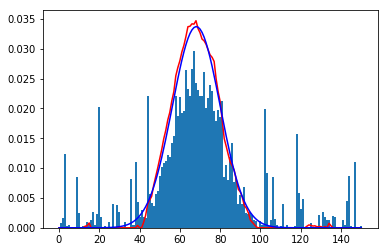

sim 10/50000, loss: 0.0118, losses_av: 0.0026, tv: 0.00248,  shrink: 0.02226, ll: 0.0019, nbins: 519
sim 20/50000, loss: 0.0014, losses_av: 0.0027, tv: 0.00247,  shrink: 0.02226, ll: 0.0019, nbins: 444
sim 30/50000, loss: 0.0018, losses_av: 0.0027, tv: 0.00247,  shrink: 0.02227, ll: 0.0019, nbins: 521
sim 40/50000, loss: 0.0011, losses_av: 0.0027, tv: 0.00246,  shrink: 0.02228, ll: 0.0019, nbins: 407
sim 50/50000, loss: 0.0112, losses_av: 0.0029, tv: 0.00246,  shrink: 0.02228, ll: 0.0019, nbins: 335
sim 60/50000, loss: 0.0007, losses_av: 0.0029, tv: 0.00245,  shrink: 0.02227, ll: 0.0019, nbins: 559
sim 70/50000, loss: 0.0070, losses_av: 0.0029, tv: 0.00245,  shrink: 0.02229, ll: 0.0019, nbins: 59
sim 80/50000, loss: 0.0071, losses_av: 0.0029, tv: 0.00244,  shrink: 0.02229, ll: 0.0019, nbins: 354
sim 90/50000, loss: 0.0030, losses_av: 0.0030, tv: 0.00244,  shrink: 0.02229, ll: 0.0019, nbins: 488
sim 100/50000, loss: 0.0008, losses_av: 0.0031, tv: 0.00243,  shrink: 0.02230, ll: 0.0019, n

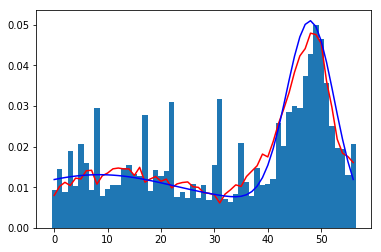

sim 110/50000, loss: 0.0008, losses_av: 0.0030, tv: 0.00243,  shrink: 0.02230, ll: 0.0019, nbins: 285
sim 120/50000, loss: 0.0012, losses_av: 0.0030, tv: 0.00242,  shrink: 0.02229, ll: 0.0019, nbins: 208
sim 130/50000, loss: 0.0023, losses_av: 0.0030, tv: 0.00242,  shrink: 0.02233, ll: 0.0019, nbins: 480
sim 140/50000, loss: 0.0057, losses_av: 0.0030, tv: 0.00241,  shrink: 0.02237, ll: 0.0019, nbins: 452
sim 150/50000, loss: 0.0020, losses_av: 0.0031, tv: 0.00241,  shrink: 0.02236, ll: 0.0019, nbins: 577
sim 160/50000, loss: 0.0019, losses_av: 0.0031, tv: 0.00240,  shrink: 0.02238, ll: 0.0019, nbins: 430
sim 170/50000, loss: 0.0029, losses_av: 0.0033, tv: 0.00240,  shrink: 0.02238, ll: 0.0019, nbins: 218
sim 180/50000, loss: 0.0043, losses_av: 0.0032, tv: 0.00239,  shrink: 0.02242, ll: 0.0019, nbins: 354
sim 190/50000, loss: 0.0037, losses_av: 0.0034, tv: 0.00239,  shrink: 0.02244, ll: 0.0019, nbins: 344
sim 200/50000, loss: 0.0068, losses_av: 0.0034, tv: 0.00239,  shrink: 0.02246, ll:

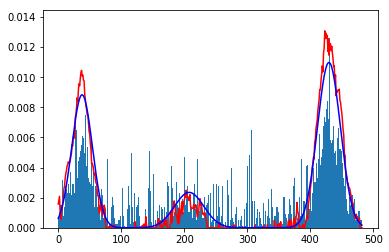

sim 210/50000, loss: 0.0010, losses_av: 0.0035, tv: 0.00238,  shrink: 0.02246, ll: 0.0019, nbins: 576
sim 220/50000, loss: 0.0340, losses_av: 0.0036, tv: 0.00238,  shrink: 0.02254, ll: 0.0020, nbins: 371
sim 230/50000, loss: 0.0075, losses_av: 0.0037, tv: 0.00237,  shrink: 0.02257, ll: 0.0020, nbins: 600
sim 240/50000, loss: 0.0085, losses_av: 0.0037, tv: 0.00237,  shrink: 0.02260, ll: 0.0020, nbins: 273
sim 250/50000, loss: 0.0060, losses_av: 0.0037, tv: 0.00236,  shrink: 0.02259, ll: 0.0020, nbins: 195
sim 260/50000, loss: 0.0464, losses_av: 0.0038, tv: 0.00236,  shrink: 0.02263, ll: 0.0021, nbins: 245
sim 270/50000, loss: 0.0008, losses_av: 0.0039, tv: 0.00235,  shrink: 0.02263, ll: 0.0021, nbins: 345
sim 280/50000, loss: 0.0012, losses_av: 0.0039, tv: 0.00235,  shrink: 0.02266, ll: 0.0021, nbins: 320
sim 290/50000, loss: 0.0017, losses_av: 0.0039, tv: 0.00234,  shrink: 0.02266, ll: 0.0021, nbins: 274
sim 300/50000, loss: 0.0056, losses_av: 0.0039, tv: 0.00234,  shrink: 0.02271, ll:

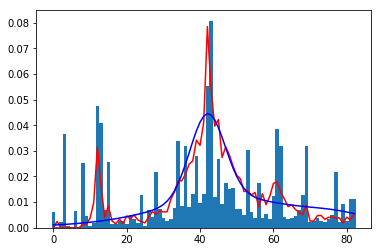

sim 310/50000, loss: 0.0039, losses_av: 0.0039, tv: 0.00233,  shrink: 0.02274, ll: 0.0021, nbins: 363
sim 320/50000, loss: 0.0032, losses_av: 0.0039, tv: 0.00233,  shrink: 0.02276, ll: 0.0021, nbins: 120
sim 330/50000, loss: 0.0079, losses_av: 0.0040, tv: 0.00232,  shrink: 0.02281, ll: 0.0021, nbins: 44
sim 340/50000, loss: 0.0030, losses_av: 0.0040, tv: 0.00232,  shrink: 0.02280, ll: 0.0021, nbins: 162
sim 350/50000, loss: 0.0015, losses_av: 0.0039, tv: 0.00232,  shrink: 0.02279, ll: 0.0021, nbins: 123
sim 360/50000, loss: 0.0026, losses_av: 0.0039, tv: 0.00231,  shrink: 0.02280, ll: 0.0021, nbins: 460
sim 370/50000, loss: 0.0006, losses_av: 0.0039, tv: 0.00231,  shrink: 0.02279, ll: 0.0021, nbins: 398
sim 380/50000, loss: 0.0032, losses_av: 0.0040, tv: 0.00230,  shrink: 0.02282, ll: 0.0021, nbins: 207
sim 390/50000, loss: 0.0011, losses_av: 0.0040, tv: 0.00230,  shrink: 0.02281, ll: 0.0021, nbins: 174
sim 400/50000, loss: 0.0105, losses_av: 0.0040, tv: 0.00229,  shrink: 0.02284, ll: 

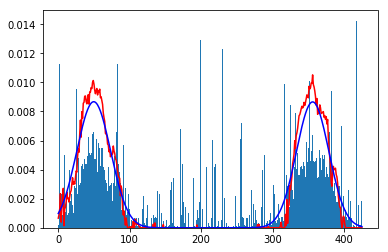

sim 410/50000, loss: 0.0010, losses_av: 0.0040, tv: 0.00229,  shrink: 0.02282, ll: 0.0021, nbins: 231
sim 420/50000, loss: 0.0009, losses_av: 0.0040, tv: 0.00228,  shrink: 0.02282, ll: 0.0021, nbins: 532
sim 430/50000, loss: 0.0010, losses_av: 0.0041, tv: 0.00228,  shrink: 0.02283, ll: 0.0021, nbins: 224
sim 440/50000, loss: 0.0100, losses_av: 0.0041, tv: 0.00227,  shrink: 0.02284, ll: 0.0021, nbins: 459
sim 450/50000, loss: 0.0014, losses_av: 0.0042, tv: 0.00227,  shrink: 0.02284, ll: 0.0021, nbins: 462
sim 460/50000, loss: 0.0068, losses_av: 0.0042, tv: 0.00227,  shrink: 0.02290, ll: 0.0021, nbins: 22
sim 470/50000, loss: 0.0019, losses_av: 0.0042, tv: 0.00226,  shrink: 0.02289, ll: 0.0021, nbins: 263
sim 480/50000, loss: 0.0049, losses_av: 0.0041, tv: 0.00226,  shrink: 0.02288, ll: 0.0021, nbins: 260
sim 490/50000, loss: 0.0167, losses_av: 0.0042, tv: 0.00225,  shrink: 0.02290, ll: 0.0021, nbins: 361
sim 500/50000, loss: 0.0048, losses_av: 0.0043, tv: 0.00225,  shrink: 0.02291, ll: 

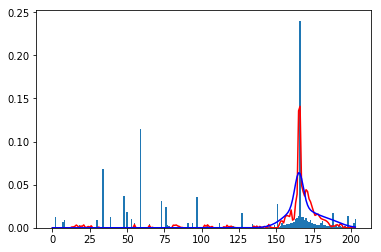

sim 510/50000, loss: 0.0026, losses_av: 0.0044, tv: 0.00224,  shrink: 0.02294, ll: 0.0021, nbins: 186
sim 520/50000, loss: 0.0028, losses_av: 0.0044, tv: 0.00224,  shrink: 0.02295, ll: 0.0021, nbins: 327
sim 530/50000, loss: 0.0016, losses_av: 0.0044, tv: 0.00223,  shrink: 0.02296, ll: 0.0021, nbins: 473
sim 540/50000, loss: 0.0011, losses_av: 0.0045, tv: 0.00223,  shrink: 0.02296, ll: 0.0021, nbins: 404
sim 550/50000, loss: 0.0013, losses_av: 0.0045, tv: 0.00222,  shrink: 0.02295, ll: 0.0021, nbins: 596
sim 560/50000, loss: 0.0040, losses_av: 0.0045, tv: 0.00222,  shrink: 0.02296, ll: 0.0021, nbins: 493
sim 570/50000, loss: 0.0036, losses_av: 0.0046, tv: 0.00222,  shrink: 0.02295, ll: 0.0021, nbins: 193
sim 580/50000, loss: 0.0036, losses_av: 0.0048, tv: 0.00221,  shrink: 0.02297, ll: 0.0021, nbins: 327
sim 590/50000, loss: 0.0015, losses_av: 0.0049, tv: 0.00221,  shrink: 0.02296, ll: 0.0021, nbins: 435
sim 600/50000, loss: 0.0044, losses_av: 0.0049, tv: 0.00220,  shrink: 0.02295, ll:

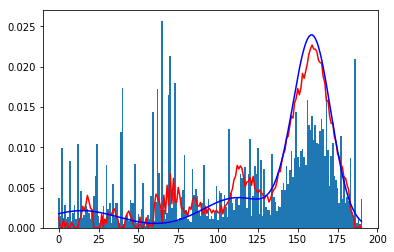

sim 610/50000, loss: 0.0009, losses_av: 0.0049, tv: 0.00220,  shrink: 0.02295, ll: 0.0021, nbins: 397
sim 620/50000, loss: 0.0066, losses_av: 0.0049, tv: 0.00219,  shrink: 0.02296, ll: 0.0021, nbins: 282
sim 630/50000, loss: 0.0042, losses_av: 0.0049, tv: 0.00219,  shrink: 0.02298, ll: 0.0021, nbins: 467
sim 640/50000, loss: 0.0108, losses_av: 0.0050, tv: 0.00219,  shrink: 0.02307, ll: 0.0021, nbins: 157
sim 650/50000, loss: 0.0084, losses_av: 0.0050, tv: 0.00218,  shrink: 0.02311, ll: 0.0021, nbins: 309
sim 660/50000, loss: 0.0023, losses_av: 0.0050, tv: 0.00218,  shrink: 0.02311, ll: 0.0021, nbins: 429
sim 670/50000, loss: 0.0028, losses_av: 0.0050, tv: 0.00217,  shrink: 0.02313, ll: 0.0021, nbins: 98
sim 680/50000, loss: 0.0005, losses_av: 0.0050, tv: 0.00217,  shrink: 0.02311, ll: 0.0021, nbins: 517
sim 690/50000, loss: 0.0053, losses_av: 0.0050, tv: 0.00216,  shrink: 0.02313, ll: 0.0021, nbins: 106
sim 700/50000, loss: 0.0022, losses_av: 0.0050, tv: 0.00216,  shrink: 0.02317, ll: 

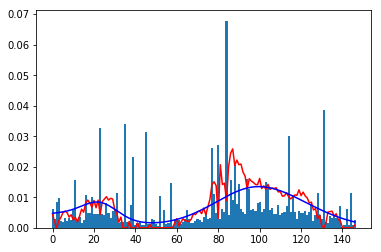

sim 710/50000, loss: 0.0035, losses_av: 0.0050, tv: 0.00216,  shrink: 0.02319, ll: 0.0021, nbins: 60
sim 720/50000, loss: 0.0010, losses_av: 0.0050, tv: 0.00215,  shrink: 0.02318, ll: 0.0021, nbins: 209
sim 730/50000, loss: 0.0009, losses_av: 0.0049, tv: 0.00215,  shrink: 0.02317, ll: 0.0021, nbins: 587
sim 740/50000, loss: 0.0007, losses_av: 0.0049, tv: 0.00214,  shrink: 0.02315, ll: 0.0021, nbins: 264
sim 750/50000, loss: 0.0281, losses_av: 0.0049, tv: 0.00214,  shrink: 0.02322, ll: 0.0022, nbins: 519
sim 760/50000, loss: 0.0007, losses_av: 0.0049, tv: 0.00213,  shrink: 0.02321, ll: 0.0022, nbins: 400
sim 770/50000, loss: 0.0093, losses_av: 0.0049, tv: 0.00213,  shrink: 0.02323, ll: 0.0022, nbins: 318
sim 780/50000, loss: 0.0008, losses_av: 0.0049, tv: 0.00213,  shrink: 0.02322, ll: 0.0022, nbins: 469
sim 790/50000, loss: 0.0042, losses_av: 0.0050, tv: 0.00212,  shrink: 0.02323, ll: 0.0022, nbins: 533
sim 800/50000, loss: 0.0009, losses_av: 0.0050, tv: 0.00212,  shrink: 0.02323, ll: 

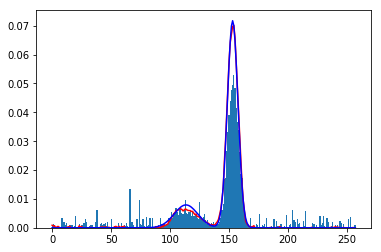

sim 810/50000, loss: 0.0010, losses_av: 0.0051, tv: 0.00211,  shrink: 0.02323, ll: 0.0022, nbins: 512
sim 820/50000, loss: 0.0026, losses_av: 0.0050, tv: 0.00211,  shrink: 0.02323, ll: 0.0022, nbins: 545
sim 830/50000, loss: 0.0013, losses_av: 0.0050, tv: 0.00210,  shrink: 0.02323, ll: 0.0022, nbins: 308
sim 840/50000, loss: 0.0017, losses_av: 0.0050, tv: 0.00210,  shrink: 0.02322, ll: 0.0022, nbins: 369
sim 850/50000, loss: 0.0045, losses_av: 0.0051, tv: 0.00210,  shrink: 0.02327, ll: 0.0022, nbins: 464
sim 860/50000, loss: 0.0021, losses_av: 0.0051, tv: 0.00209,  shrink: 0.02329, ll: 0.0022, nbins: 307
sim 870/50000, loss: 0.0019, losses_av: 0.0050, tv: 0.00209,  shrink: 0.02329, ll: 0.0022, nbins: 237
sim 880/50000, loss: 0.0129, losses_av: 0.0051, tv: 0.00208,  shrink: 0.02332, ll: 0.0022, nbins: 80
sim 890/50000, loss: 0.0128, losses_av: 0.0051, tv: 0.00208,  shrink: 0.02334, ll: 0.0022, nbins: 50
sim 900/50000, loss: 0.0015, losses_av: 0.0051, tv: 0.00208,  shrink: 0.02334, ll: 0

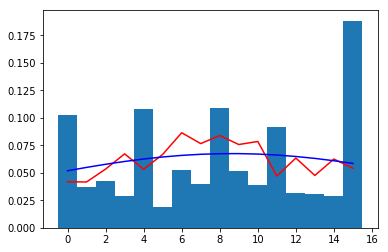

sim 910/50000, loss: 0.0044, losses_av: 0.0050, tv: 0.00207,  shrink: 0.02334, ll: 0.0022, nbins: 180
sim 920/50000, loss: 0.0054, losses_av: 0.0050, tv: 0.00207,  shrink: 0.02333, ll: 0.0022, nbins: 383
sim 930/50000, loss: 0.0016, losses_av: 0.0050, tv: 0.00206,  shrink: 0.02335, ll: 0.0022, nbins: 231
sim 940/50000, loss: 0.0036, losses_av: 0.0050, tv: 0.00206,  shrink: 0.02334, ll: 0.0022, nbins: 338
sim 950/50000, loss: 0.0034, losses_av: 0.0050, tv: 0.00205,  shrink: 0.02337, ll: 0.0022, nbins: 213
sim 960/50000, loss: 0.0051, losses_av: 0.0050, tv: 0.00205,  shrink: 0.02338, ll: 0.0022, nbins: 197
sim 970/50000, loss: 0.0032, losses_av: 0.0050, tv: 0.00205,  shrink: 0.02340, ll: 0.0022, nbins: 291
sim 980/50000, loss: 0.0013, losses_av: 0.0050, tv: 0.00204,  shrink: 0.02340, ll: 0.0022, nbins: 324
sim 990/50000, loss: 0.0026, losses_av: 0.0050, tv: 0.00204,  shrink: 0.02341, ll: 0.0022, nbins: 243
sim 1000/50000, loss: 0.0032, losses_av: 0.0051, tv: 0.00203,  shrink: 0.02343, ll

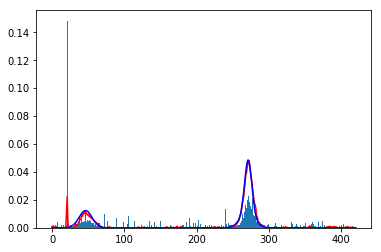

sim 1010/50000, loss: 0.0030, losses_av: 0.0052, tv: 0.00203,  shrink: 0.02346, ll: 0.0022, nbins: 588
sim 1020/50000, loss: 0.0075, losses_av: 0.0052, tv: 0.00203,  shrink: 0.02349, ll: 0.0022, nbins: 215
sim 1030/50000, loss: 0.0122, losses_av: 0.0052, tv: 0.00202,  shrink: 0.02351, ll: 0.0022, nbins: 194
sim 1040/50000, loss: 0.0016, losses_av: 0.0052, tv: 0.00202,  shrink: 0.02350, ll: 0.0022, nbins: 309
sim 1050/50000, loss: 0.0016, losses_av: 0.0052, tv: 0.00201,  shrink: 0.02351, ll: 0.0022, nbins: 136
sim 1060/50000, loss: 0.0006, losses_av: 0.0052, tv: 0.00201,  shrink: 0.02351, ll: 0.0022, nbins: 494
sim 1070/50000, loss: 0.0043, losses_av: 0.0052, tv: 0.00201,  shrink: 0.02352, ll: 0.0022, nbins: 556
sim 1080/50000, loss: 0.0030, losses_av: 0.0052, tv: 0.00200,  shrink: 0.02351, ll: 0.0022, nbins: 132
sim 1090/50000, loss: 0.0017, losses_av: 0.0052, tv: 0.00200,  shrink: 0.02353, ll: 0.0022, nbins: 286
sim 1100/50000, loss: 0.0278, losses_av: 0.0052, tv: 0.00199,  shrink: 0.

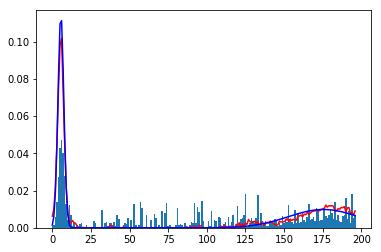

sim 1110/50000, loss: 0.0018, losses_av: 0.0053, tv: 0.00199,  shrink: 0.02355, ll: 0.0023, nbins: 80
sim 1120/50000, loss: 0.0116, losses_av: 0.0053, tv: 0.00199,  shrink: 0.02357, ll: 0.0023, nbins: 42
sim 1130/50000, loss: 0.0010, losses_av: 0.0054, tv: 0.00198,  shrink: 0.02358, ll: 0.0023, nbins: 464
sim 1140/50000, loss: 0.0091, losses_av: 0.0055, tv: 0.00198,  shrink: 0.02359, ll: 0.0023, nbins: 159
sim 1150/50000, loss: 0.0034, losses_av: 0.0055, tv: 0.00197,  shrink: 0.02360, ll: 0.0023, nbins: 84
sim 1160/50000, loss: 0.0011, losses_av: 0.0055, tv: 0.00197,  shrink: 0.02359, ll: 0.0023, nbins: 375
sim 1170/50000, loss: 0.0045, losses_av: 0.0055, tv: 0.00197,  shrink: 0.02359, ll: 0.0023, nbins: 502
sim 1180/50000, loss: 0.0011, losses_av: 0.0056, tv: 0.00196,  shrink: 0.02358, ll: 0.0023, nbins: 316
sim 1190/50000, loss: 0.0014, losses_av: 0.0055, tv: 0.00196,  shrink: 0.02356, ll: 0.0023, nbins: 295
sim 1200/50000, loss: 0.0010, losses_av: 0.0055, tv: 0.00195,  shrink: 0.023

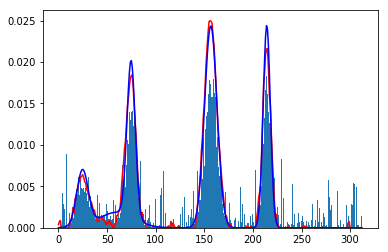

sim 1210/50000, loss: 0.0009, losses_av: 0.0055, tv: 0.00195,  shrink: 0.02355, ll: 0.0023, nbins: 309
sim 1220/50000, loss: 0.0032, losses_av: 0.0054, tv: 0.00195,  shrink: 0.02355, ll: 0.0023, nbins: 98
sim 1230/50000, loss: 0.0028, losses_av: 0.0055, tv: 0.00194,  shrink: 0.02354, ll: 0.0023, nbins: 243
sim 1240/50000, loss: 0.0043, losses_av: 0.0055, tv: 0.00194,  shrink: 0.02355, ll: 0.0023, nbins: 46
sim 1250/50000, loss: 0.0007, losses_av: 0.0055, tv: 0.00194,  shrink: 0.02353, ll: 0.0023, nbins: 485
sim 1260/50000, loss: 0.0048, losses_av: 0.0054, tv: 0.00193,  shrink: 0.02357, ll: 0.0023, nbins: 328
sim 1270/50000, loss: 0.0020, losses_av: 0.0054, tv: 0.00193,  shrink: 0.02356, ll: 0.0023, nbins: 158
sim 1280/50000, loss: 0.0014, losses_av: 0.0054, tv: 0.00192,  shrink: 0.02355, ll: 0.0023, nbins: 487
sim 1290/50000, loss: 0.0012, losses_av: 0.0054, tv: 0.00192,  shrink: 0.02354, ll: 0.0023, nbins: 522
sim 1300/50000, loss: 0.0038, losses_av: 0.0054, tv: 0.00192,  shrink: 0.02

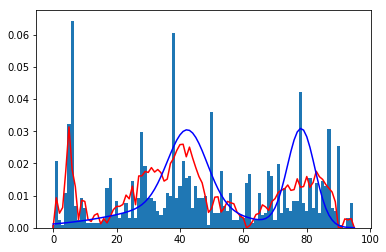

sim 1310/50000, loss: 0.0011, losses_av: 0.0054, tv: 0.00191,  shrink: 0.02355, ll: 0.0023, nbins: 373
sim 1320/50000, loss: 0.0078, losses_av: 0.0053, tv: 0.00191,  shrink: 0.02360, ll: 0.0023, nbins: 484
sim 1330/50000, loss: 0.0014, losses_av: 0.0054, tv: 0.00191,  shrink: 0.02360, ll: 0.0023, nbins: 169
sim 1340/50000, loss: 0.0010, losses_av: 0.0054, tv: 0.00190,  shrink: 0.02360, ll: 0.0023, nbins: 338
sim 1350/50000, loss: 0.0012, losses_av: 0.0054, tv: 0.00190,  shrink: 0.02361, ll: 0.0023, nbins: 561
sim 1360/50000, loss: 0.0017, losses_av: 0.0054, tv: 0.00189,  shrink: 0.02360, ll: 0.0023, nbins: 139
sim 1370/50000, loss: 0.0012, losses_av: 0.0053, tv: 0.00189,  shrink: 0.02360, ll: 0.0023, nbins: 273
sim 1380/50000, loss: 0.0130, losses_av: 0.0053, tv: 0.00189,  shrink: 0.02363, ll: 0.0023, nbins: 48
sim 1390/50000, loss: 0.0010, losses_av: 0.0053, tv: 0.00188,  shrink: 0.02363, ll: 0.0023, nbins: 234
sim 1400/50000, loss: 0.0018, losses_av: 0.0054, tv: 0.00188,  shrink: 0.0

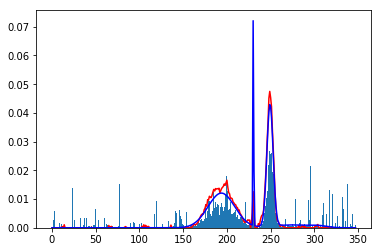

sim 1410/50000, loss: 0.0019, losses_av: 0.0054, tv: 0.00187,  shrink: 0.02363, ll: 0.0023, nbins: 296
sim 1420/50000, loss: 0.0023, losses_av: 0.0055, tv: 0.00187,  shrink: 0.02364, ll: 0.0023, nbins: 472
sim 1430/50000, loss: 0.0011, losses_av: 0.0055, tv: 0.00187,  shrink: 0.02364, ll: 0.0023, nbins: 525
sim 1440/50000, loss: 0.0179, losses_av: 0.0055, tv: 0.00186,  shrink: 0.02365, ll: 0.0023, nbins: 143
sim 1450/50000, loss: 0.0135, losses_av: 0.0056, tv: 0.00186,  shrink: 0.02367, ll: 0.0023, nbins: 109
sim 1460/50000, loss: 0.0069, losses_av: 0.0056, tv: 0.00186,  shrink: 0.02368, ll: 0.0023, nbins: 445
sim 1470/50000, loss: 0.0016, losses_av: 0.0055, tv: 0.00185,  shrink: 0.02369, ll: 0.0023, nbins: 585
sim 1480/50000, loss: 0.0065, losses_av: 0.0056, tv: 0.00185,  shrink: 0.02369, ll: 0.0023, nbins: 55
sim 1490/50000, loss: 0.0142, losses_av: 0.0056, tv: 0.00185,  shrink: 0.02379, ll: 0.0023, nbins: 384
sim 1500/50000, loss: 0.0062, losses_av: 0.0056, tv: 0.00184,  shrink: 0.0

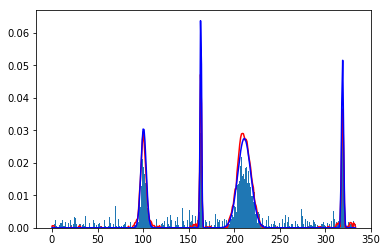

sim 1510/50000, loss: 0.0056, losses_av: 0.0056, tv: 0.00184,  shrink: 0.02390, ll: 0.0023, nbins: 449
sim 1520/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00183,  shrink: 0.02389, ll: 0.0023, nbins: 190
sim 1530/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00183,  shrink: 0.02391, ll: 0.0023, nbins: 256
sim 1540/50000, loss: 0.0029, losses_av: 0.0056, tv: 0.00183,  shrink: 0.02393, ll: 0.0023, nbins: 160
sim 1550/50000, loss: 0.0086, losses_av: 0.0056, tv: 0.00182,  shrink: 0.02392, ll: 0.0023, nbins: 496
sim 1560/50000, loss: 0.0025, losses_av: 0.0056, tv: 0.00182,  shrink: 0.02392, ll: 0.0023, nbins: 136
sim 1570/50000, loss: 0.0010, losses_av: 0.0056, tv: 0.00182,  shrink: 0.02393, ll: 0.0023, nbins: 330
sim 1580/50000, loss: 0.0014, losses_av: 0.0057, tv: 0.00181,  shrink: 0.02394, ll: 0.0023, nbins: 172
sim 1590/50000, loss: 0.0102, losses_av: 0.0058, tv: 0.00181,  shrink: 0.02399, ll: 0.0023, nbins: 56
sim 1600/50000, loss: 0.0014, losses_av: 0.0058, tv: 0.00181,  shrink: 0.0

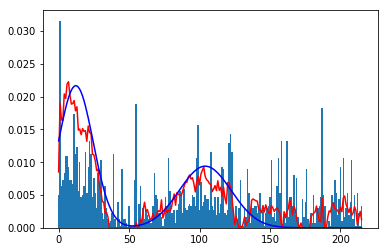

sim 1610/50000, loss: 0.0014, losses_av: 0.0058, tv: 0.00180,  shrink: 0.02398, ll: 0.0023, nbins: 221
sim 1620/50000, loss: 0.0124, losses_av: 0.0058, tv: 0.00180,  shrink: 0.02399, ll: 0.0024, nbins: 187
sim 1630/50000, loss: 0.0012, losses_av: 0.0058, tv: 0.00179,  shrink: 0.02400, ll: 0.0023, nbins: 372
sim 1640/50000, loss: 0.0012, losses_av: 0.0058, tv: 0.00179,  shrink: 0.02399, ll: 0.0023, nbins: 578
sim 1650/50000, loss: 0.0017, losses_av: 0.0057, tv: 0.00179,  shrink: 0.02399, ll: 0.0023, nbins: 286
sim 1660/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00178,  shrink: 0.02398, ll: 0.0023, nbins: 580
sim 1670/50000, loss: 0.0009, losses_av: 0.0058, tv: 0.00178,  shrink: 0.02398, ll: 0.0023, nbins: 537
sim 1680/50000, loss: 0.0084, losses_av: 0.0058, tv: 0.00178,  shrink: 0.02401, ll: 0.0023, nbins: 363
sim 1690/50000, loss: 0.0023, losses_av: 0.0058, tv: 0.00177,  shrink: 0.02404, ll: 0.0023, nbins: 285
sim 1700/50000, loss: 0.0119, losses_av: 0.0059, tv: 0.00177,  shrink: 0.

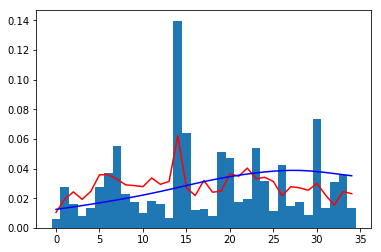

sim 1710/50000, loss: 0.0021, losses_av: 0.0059, tv: 0.00177,  shrink: 0.02409, ll: 0.0023, nbins: 172
sim 1720/50000, loss: 0.0018, losses_av: 0.0060, tv: 0.00176,  shrink: 0.02409, ll: 0.0023, nbins: 210
sim 1730/50000, loss: 0.0082, losses_av: 0.0060, tv: 0.00176,  shrink: 0.02416, ll: 0.0023, nbins: 300
sim 1740/50000, loss: 0.0027, losses_av: 0.0060, tv: 0.00176,  shrink: 0.02417, ll: 0.0023, nbins: 517
sim 1750/50000, loss: 0.0054, losses_av: 0.0060, tv: 0.00175,  shrink: 0.02419, ll: 0.0023, nbins: 397
sim 1760/50000, loss: 0.0103, losses_av: 0.0060, tv: 0.00175,  shrink: 0.02425, ll: 0.0024, nbins: 25
sim 1770/50000, loss: 0.0005, losses_av: 0.0059, tv: 0.00175,  shrink: 0.02423, ll: 0.0024, nbins: 227
sim 1780/50000, loss: 0.0029, losses_av: 0.0058, tv: 0.00174,  shrink: 0.02424, ll: 0.0024, nbins: 390
sim 1790/50000, loss: 0.0015, losses_av: 0.0058, tv: 0.00174,  shrink: 0.02425, ll: 0.0023, nbins: 385
sim 1800/50000, loss: 0.0112, losses_av: 0.0058, tv: 0.00174,  shrink: 0.0

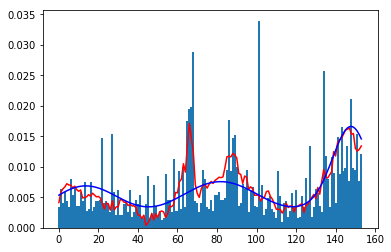

sim 1810/50000, loss: 0.0014, losses_av: 0.0058, tv: 0.00173,  shrink: 0.02425, ll: 0.0024, nbins: 395
sim 1820/50000, loss: 0.0060, losses_av: 0.0057, tv: 0.00173,  shrink: 0.02425, ll: 0.0024, nbins: 138
sim 1830/50000, loss: 0.0028, losses_av: 0.0056, tv: 0.00173,  shrink: 0.02424, ll: 0.0024, nbins: 316
sim 1840/50000, loss: 0.0065, losses_av: 0.0057, tv: 0.00172,  shrink: 0.02423, ll: 0.0024, nbins: 321
sim 1850/50000, loss: 0.0007, losses_av: 0.0058, tv: 0.00172,  shrink: 0.02422, ll: 0.0024, nbins: 595
sim 1860/50000, loss: 0.0104, losses_av: 0.0057, tv: 0.00172,  shrink: 0.02425, ll: 0.0024, nbins: 228
sim 1870/50000, loss: 0.0048, losses_av: 0.0057, tv: 0.00171,  shrink: 0.02428, ll: 0.0024, nbins: 38
sim 1880/50000, loss: 0.0053, losses_av: 0.0057, tv: 0.00171,  shrink: 0.02433, ll: 0.0024, nbins: 296
sim 1890/50000, loss: 0.0101, losses_av: 0.0056, tv: 0.00171,  shrink: 0.02434, ll: 0.0024, nbins: 402
sim 1900/50000, loss: 0.0061, losses_av: 0.0056, tv: 0.00170,  shrink: 0.0

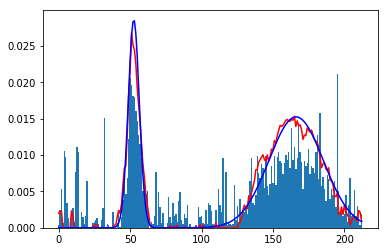

sim 1910/50000, loss: 0.0024, losses_av: 0.0057, tv: 0.00170,  shrink: 0.02435, ll: 0.0024, nbins: 142
sim 1920/50000, loss: 0.0067, losses_av: 0.0057, tv: 0.00170,  shrink: 0.02439, ll: 0.0024, nbins: 441
sim 1930/50000, loss: 0.0038, losses_av: 0.0057, tv: 0.00169,  shrink: 0.02445, ll: 0.0024, nbins: 371
sim 1940/50000, loss: 0.0024, losses_av: 0.0057, tv: 0.00169,  shrink: 0.02447, ll: 0.0024, nbins: 289
sim 1950/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00169,  shrink: 0.02448, ll: 0.0024, nbins: 437
sim 1960/50000, loss: 0.0041, losses_av: 0.0057, tv: 0.00168,  shrink: 0.02449, ll: 0.0024, nbins: 278
sim 1970/50000, loss: 0.0160, losses_av: 0.0058, tv: 0.00168,  shrink: 0.02458, ll: 0.0024, nbins: 434
sim 1980/50000, loss: 0.0061, losses_av: 0.0057, tv: 0.00168,  shrink: 0.02460, ll: 0.0024, nbins: 80
sim 1990/50000, loss: 0.0038, losses_av: 0.0057, tv: 0.00167,  shrink: 0.02463, ll: 0.0024, nbins: 272
sim 2000/50000, loss: 0.0045, losses_av: 0.0057, tv: 0.00167,  shrink: 0.0

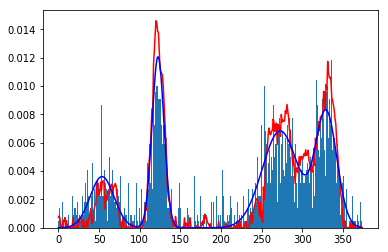

sim 2010/50000, loss: 0.0090, losses_av: 0.0057, tv: 0.00167,  shrink: 0.02467, ll: 0.0024, nbins: 200
sim 2020/50000, loss: 0.0029, losses_av: 0.0057, tv: 0.00166,  shrink: 0.02469, ll: 0.0024, nbins: 323
sim 2030/50000, loss: 0.0026, losses_av: 0.0058, tv: 0.00166,  shrink: 0.02470, ll: 0.0024, nbins: 178
sim 2040/50000, loss: 0.0066, losses_av: 0.0058, tv: 0.00166,  shrink: 0.02475, ll: 0.0024, nbins: 32
sim 2050/50000, loss: 0.0019, losses_av: 0.0057, tv: 0.00165,  shrink: 0.02474, ll: 0.0024, nbins: 161
sim 2060/50000, loss: 0.0008, losses_av: 0.0057, tv: 0.00165,  shrink: 0.02473, ll: 0.0024, nbins: 199
sim 2070/50000, loss: 0.0011, losses_av: 0.0058, tv: 0.00165,  shrink: 0.02471, ll: 0.0024, nbins: 208
sim 2080/50000, loss: 0.0007, losses_av: 0.0058, tv: 0.00164,  shrink: 0.02469, ll: 0.0024, nbins: 508
sim 2090/50000, loss: 0.0022, losses_av: 0.0058, tv: 0.00164,  shrink: 0.02470, ll: 0.0024, nbins: 163
sim 2100/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00164,  shrink: 0.0

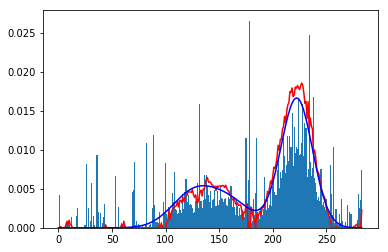

sim 2110/50000, loss: 0.0041, losses_av: 0.0057, tv: 0.00163,  shrink: 0.02473, ll: 0.0024, nbins: 328
sim 2120/50000, loss: 0.0017, losses_av: 0.0057, tv: 0.00163,  shrink: 0.02472, ll: 0.0024, nbins: 356
sim 2130/50000, loss: 0.0011, losses_av: 0.0057, tv: 0.00163,  shrink: 0.02470, ll: 0.0024, nbins: 435
sim 2140/50000, loss: 0.0009, losses_av: 0.0056, tv: 0.00162,  shrink: 0.02471, ll: 0.0024, nbins: 443
sim 2150/50000, loss: 0.0038, losses_av: 0.0056, tv: 0.00162,  shrink: 0.02472, ll: 0.0024, nbins: 248
sim 2160/50000, loss: 0.0065, losses_av: 0.0056, tv: 0.00162,  shrink: 0.02473, ll: 0.0024, nbins: 41
sim 2170/50000, loss: 0.0045, losses_av: 0.0056, tv: 0.00161,  shrink: 0.02472, ll: 0.0024, nbins: 124
sim 2180/50000, loss: 0.0072, losses_av: 0.0056, tv: 0.00161,  shrink: 0.02474, ll: 0.0024, nbins: 206
sim 2190/50000, loss: 0.0045, losses_av: 0.0056, tv: 0.00161,  shrink: 0.02477, ll: 0.0024, nbins: 29
sim 2200/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00160,  shrink: 0.02

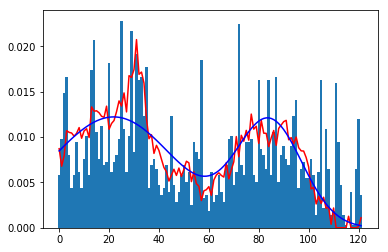

sim 2210/50000, loss: 0.0043, losses_av: 0.0056, tv: 0.00160,  shrink: 0.02481, ll: 0.0024, nbins: 499
sim 2220/50000, loss: 0.0015, losses_av: 0.0056, tv: 0.00160,  shrink: 0.02482, ll: 0.0024, nbins: 309
sim 2230/50000, loss: 0.0100, losses_av: 0.0056, tv: 0.00159,  shrink: 0.02482, ll: 0.0024, nbins: 539
sim 2240/50000, loss: 0.0162, losses_av: 0.0057, tv: 0.00159,  shrink: 0.02485, ll: 0.0024, nbins: 67
sim 2250/50000, loss: 0.0012, losses_av: 0.0056, tv: 0.00159,  shrink: 0.02484, ll: 0.0024, nbins: 543
sim 2260/50000, loss: 0.0014, losses_av: 0.0056, tv: 0.00158,  shrink: 0.02486, ll: 0.0024, nbins: 303
sim 2270/50000, loss: 0.0016, losses_av: 0.0055, tv: 0.00158,  shrink: 0.02485, ll: 0.0024, nbins: 249
sim 2280/50000, loss: 0.0007, losses_av: 0.0055, tv: 0.00158,  shrink: 0.02484, ll: 0.0024, nbins: 508
sim 2290/50000, loss: 0.0028, losses_av: 0.0055, tv: 0.00158,  shrink: 0.02485, ll: 0.0024, nbins: 82
sim 2300/50000, loss: 0.0065, losses_av: 0.0055, tv: 0.00157,  shrink: 0.02

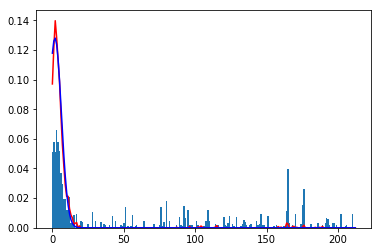

sim 2310/50000, loss: 0.0010, losses_av: 0.0054, tv: 0.00157,  shrink: 0.02487, ll: 0.0024, nbins: 390
sim 2320/50000, loss: 0.0011, losses_av: 0.0055, tv: 0.00157,  shrink: 0.02486, ll: 0.0024, nbins: 207
sim 2330/50000, loss: 0.0134, losses_av: 0.0055, tv: 0.00156,  shrink: 0.02497, ll: 0.0024, nbins: 14
sim 2340/50000, loss: 0.0027, losses_av: 0.0056, tv: 0.00156,  shrink: 0.02500, ll: 0.0024, nbins: 213
sim 2350/50000, loss: 0.0021, losses_av: 0.0055, tv: 0.00156,  shrink: 0.02502, ll: 0.0024, nbins: 528
sim 2360/50000, loss: 0.0019, losses_av: 0.0056, tv: 0.00155,  shrink: 0.02502, ll: 0.0024, nbins: 230
sim 2370/50000, loss: 0.0019, losses_av: 0.0056, tv: 0.00155,  shrink: 0.02504, ll: 0.0024, nbins: 404
sim 2380/50000, loss: 0.0013, losses_av: 0.0055, tv: 0.00155,  shrink: 0.02503, ll: 0.0024, nbins: 254
sim 2390/50000, loss: 0.0028, losses_av: 0.0055, tv: 0.00154,  shrink: 0.02502, ll: 0.0024, nbins: 187
sim 2400/50000, loss: 0.0038, losses_av: 0.0056, tv: 0.00154,  shrink: 0.0

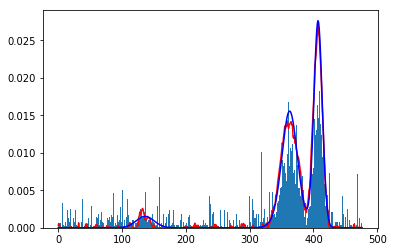

sim 2410/50000, loss: 0.0096, losses_av: 0.0056, tv: 0.00154,  shrink: 0.02503, ll: 0.0025, nbins: 336
sim 2420/50000, loss: 0.0006, losses_av: 0.0055, tv: 0.00153,  shrink: 0.02501, ll: 0.0024, nbins: 577
sim 2430/50000, loss: 0.0032, losses_av: 0.0055, tv: 0.00153,  shrink: 0.02501, ll: 0.0024, nbins: 151
sim 2440/50000, loss: 0.0034, losses_av: 0.0055, tv: 0.00153,  shrink: 0.02503, ll: 0.0024, nbins: 493
sim 2450/50000, loss: 0.0011, losses_av: 0.0058, tv: 0.00153,  shrink: 0.02503, ll: 0.0024, nbins: 279
sim 2460/50000, loss: 0.0021, losses_av: 0.0057, tv: 0.00152,  shrink: 0.02503, ll: 0.0024, nbins: 242
sim 2470/50000, loss: 0.0008, losses_av: 0.0058, tv: 0.00152,  shrink: 0.02502, ll: 0.0024, nbins: 254
sim 2480/50000, loss: 0.0036, losses_av: 0.0057, tv: 0.00152,  shrink: 0.02502, ll: 0.0024, nbins: 378
sim 2490/50000, loss: 0.0014, losses_av: 0.0057, tv: 0.00151,  shrink: 0.02502, ll: 0.0024, nbins: 297
sim 2500/50000, loss: 0.0211, losses_av: 0.0058, tv: 0.00151,  shrink: 0.

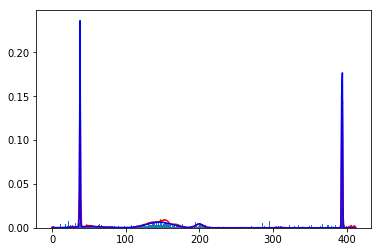

sim 2510/50000, loss: 0.0006, losses_av: 0.0057, tv: 0.00151,  shrink: 0.02503, ll: 0.0025, nbins: 367
sim 2520/50000, loss: 0.0039, losses_av: 0.0057, tv: 0.00150,  shrink: 0.02504, ll: 0.0025, nbins: 258
sim 2530/50000, loss: 0.0030, losses_av: 0.0056, tv: 0.00150,  shrink: 0.02507, ll: 0.0025, nbins: 472
sim 2540/50000, loss: 0.0267, losses_av: 0.0057, tv: 0.00150,  shrink: 0.02508, ll: 0.0025, nbins: 215
sim 2550/50000, loss: 0.0015, losses_av: 0.0057, tv: 0.00150,  shrink: 0.02507, ll: 0.0025, nbins: 531
sim 2560/50000, loss: 0.0013, losses_av: 0.0057, tv: 0.00149,  shrink: 0.02506, ll: 0.0025, nbins: 330
sim 2570/50000, loss: 0.0008, losses_av: 0.0058, tv: 0.00149,  shrink: 0.02505, ll: 0.0025, nbins: 284
sim 2580/50000, loss: 0.0036, losses_av: 0.0058, tv: 0.00149,  shrink: 0.02506, ll: 0.0025, nbins: 210
sim 2590/50000, loss: 0.0120, losses_av: 0.0058, tv: 0.00148,  shrink: 0.02515, ll: 0.0025, nbins: 160
sim 2600/50000, loss: 0.0018, losses_av: 0.0058, tv: 0.00148,  shrink: 0.

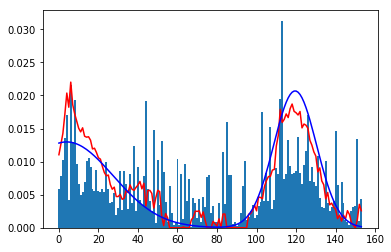

sim 2610/50000, loss: 0.0015, losses_av: 0.0057, tv: 0.00148,  shrink: 0.02520, ll: 0.0025, nbins: 440
sim 2620/50000, loss: 0.0017, losses_av: 0.0057, tv: 0.00148,  shrink: 0.02523, ll: 0.0025, nbins: 482
sim 2630/50000, loss: 0.0043, losses_av: 0.0056, tv: 0.00147,  shrink: 0.02524, ll: 0.0025, nbins: 44
sim 2640/50000, loss: 0.0006, losses_av: 0.0056, tv: 0.00147,  shrink: 0.02522, ll: 0.0025, nbins: 510
sim 2650/50000, loss: 0.0007, losses_av: 0.0055, tv: 0.00147,  shrink: 0.02521, ll: 0.0025, nbins: 465
sim 2660/50000, loss: 0.0205, losses_av: 0.0056, tv: 0.00146,  shrink: 0.02522, ll: 0.0025, nbins: 427
sim 2670/50000, loss: 0.0359, losses_av: 0.0058, tv: 0.00146,  shrink: 0.02526, ll: 0.0026, nbins: 346
sim 2680/50000, loss: 0.0019, losses_av: 0.0059, tv: 0.00146,  shrink: 0.02525, ll: 0.0026, nbins: 372
sim 2690/50000, loss: 0.0023, losses_av: 0.0059, tv: 0.00146,  shrink: 0.02524, ll: 0.0026, nbins: 212
sim 2700/50000, loss: 0.0008, losses_av: 0.0059, tv: 0.00145,  shrink: 0.0

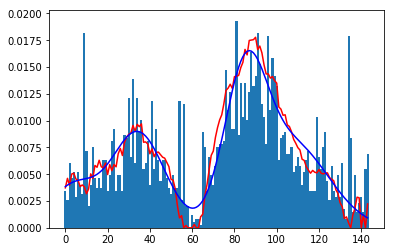

sim 2710/50000, loss: 0.0095, losses_av: 0.0059, tv: 0.00145,  shrink: 0.02530, ll: 0.0026, nbins: 577
sim 2720/50000, loss: 0.0006, losses_av: 0.0060, tv: 0.00145,  shrink: 0.02529, ll: 0.0026, nbins: 564
sim 2730/50000, loss: 0.0020, losses_av: 0.0060, tv: 0.00144,  shrink: 0.02530, ll: 0.0026, nbins: 103
sim 2740/50000, loss: 0.0020, losses_av: 0.0061, tv: 0.00144,  shrink: 0.02528, ll: 0.0026, nbins: 415
sim 2750/50000, loss: 0.0014, losses_av: 0.0061, tv: 0.00144,  shrink: 0.02528, ll: 0.0026, nbins: 562
sim 2760/50000, loss: 0.0039, losses_av: 0.0061, tv: 0.00144,  shrink: 0.02527, ll: 0.0026, nbins: 557
sim 2770/50000, loss: 0.0016, losses_av: 0.0061, tv: 0.00143,  shrink: 0.02526, ll: 0.0026, nbins: 102
sim 2780/50000, loss: 0.0049, losses_av: 0.0061, tv: 0.00143,  shrink: 0.02525, ll: 0.0026, nbins: 175
sim 2790/50000, loss: 0.0033, losses_av: 0.0061, tv: 0.00143,  shrink: 0.02525, ll: 0.0026, nbins: 273
sim 2800/50000, loss: 0.0664, losses_av: 0.0063, tv: 0.00142,  shrink: 0.

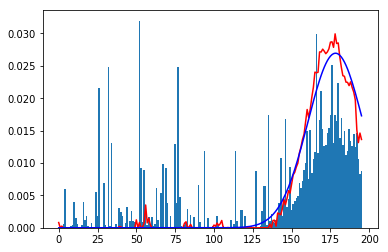

sim 2810/50000, loss: 0.0051, losses_av: 0.0063, tv: 0.00142,  shrink: 0.02542, ll: 0.0027, nbins: 135
sim 2820/50000, loss: 0.0018, losses_av: 0.0063, tv: 0.00142,  shrink: 0.02541, ll: 0.0027, nbins: 494
sim 2830/50000, loss: 0.0017, losses_av: 0.0062, tv: 0.00142,  shrink: 0.02540, ll: 0.0027, nbins: 202
sim 2840/50000, loss: 0.0027, losses_av: 0.0062, tv: 0.00141,  shrink: 0.02542, ll: 0.0027, nbins: 524
sim 2850/50000, loss: 0.0031, losses_av: 0.0061, tv: 0.00141,  shrink: 0.02544, ll: 0.0027, nbins: 134
sim 2860/50000, loss: 0.0021, losses_av: 0.0061, tv: 0.00141,  shrink: 0.02548, ll: 0.0027, nbins: 256
sim 2870/50000, loss: 0.0240, losses_av: 0.0061, tv: 0.00140,  shrink: 0.02554, ll: 0.0027, nbins: 544
sim 2880/50000, loss: 0.0032, losses_av: 0.0061, tv: 0.00140,  shrink: 0.02557, ll: 0.0027, nbins: 303
sim 2890/50000, loss: 0.0013, losses_av: 0.0061, tv: 0.00140,  shrink: 0.02555, ll: 0.0027, nbins: 445
sim 2900/50000, loss: 0.0122, losses_av: 0.0061, tv: 0.00140,  shrink: 0.

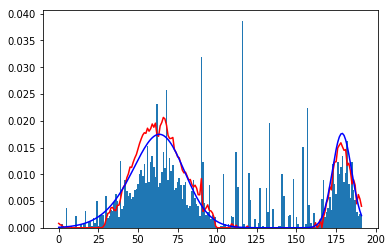

sim 2910/50000, loss: 0.0089, losses_av: 0.0061, tv: 0.00139,  shrink: 0.02569, ll: 0.0027, nbins: 39
sim 2920/50000, loss: 0.0227, losses_av: 0.0062, tv: 0.00139,  shrink: 0.02571, ll: 0.0027, nbins: 63
sim 2930/50000, loss: 0.0019, losses_av: 0.0061, tv: 0.00139,  shrink: 0.02570, ll: 0.0027, nbins: 446
sim 2940/50000, loss: 0.0009, losses_av: 0.0060, tv: 0.00139,  shrink: 0.02570, ll: 0.0027, nbins: 413
sim 2950/50000, loss: 0.0013, losses_av: 0.0060, tv: 0.00138,  shrink: 0.02570, ll: 0.0027, nbins: 62
sim 2960/50000, loss: 0.0042, losses_av: 0.0059, tv: 0.00138,  shrink: 0.02573, ll: 0.0027, nbins: 340
sim 2970/50000, loss: 0.0018, losses_av: 0.0059, tv: 0.00138,  shrink: 0.02575, ll: 0.0027, nbins: 292
sim 2980/50000, loss: 0.0045, losses_av: 0.0059, tv: 0.00137,  shrink: 0.02575, ll: 0.0027, nbins: 66
sim 2990/50000, loss: 0.0020, losses_av: 0.0058, tv: 0.00137,  shrink: 0.02573, ll: 0.0027, nbins: 348
sim 3000/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00137,  shrink: 0.0257

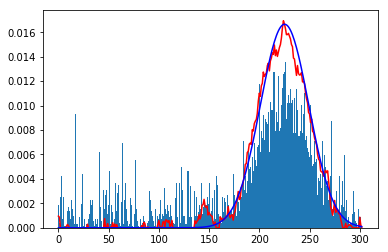

sim 3010/50000, loss: 0.0021, losses_av: 0.0057, tv: 0.00137,  shrink: 0.02573, ll: 0.0027, nbins: 345
sim 3020/50000, loss: 0.0008, losses_av: 0.0058, tv: 0.00136,  shrink: 0.02572, ll: 0.0027, nbins: 576
sim 3030/50000, loss: 0.0017, losses_av: 0.0057, tv: 0.00136,  shrink: 0.02574, ll: 0.0027, nbins: 246
sim 3040/50000, loss: 0.0038, losses_av: 0.0057, tv: 0.00136,  shrink: 0.02573, ll: 0.0027, nbins: 402
sim 3050/50000, loss: 0.0007, losses_av: 0.0057, tv: 0.00136,  shrink: 0.02571, ll: 0.0027, nbins: 225
sim 3060/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00135,  shrink: 0.02568, ll: 0.0027, nbins: 330
sim 3070/50000, loss: 0.0007, losses_av: 0.0056, tv: 0.00135,  shrink: 0.02568, ll: 0.0027, nbins: 460
sim 3080/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00135,  shrink: 0.02568, ll: 0.0027, nbins: 457
sim 3090/50000, loss: 0.0013, losses_av: 0.0057, tv: 0.00134,  shrink: 0.02567, ll: 0.0027, nbins: 554
sim 3100/50000, loss: 0.0029, losses_av: 0.0056, tv: 0.00134,  shrink: 0.

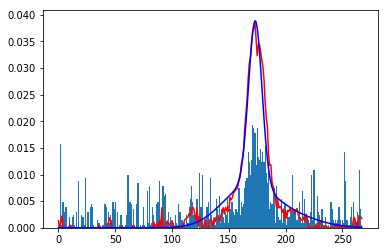

sim 3110/50000, loss: 0.0023, losses_av: 0.0056, tv: 0.00134,  shrink: 0.02568, ll: 0.0027, nbins: 326
sim 3120/50000, loss: 0.0010, losses_av: 0.0056, tv: 0.00134,  shrink: 0.02566, ll: 0.0027, nbins: 298
sim 3130/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00133,  shrink: 0.02569, ll: 0.0027, nbins: 372
sim 3140/50000, loss: 0.0020, losses_av: 0.0056, tv: 0.00133,  shrink: 0.02570, ll: 0.0027, nbins: 196
sim 3150/50000, loss: 0.0047, losses_av: 0.0056, tv: 0.00133,  shrink: 0.02572, ll: 0.0027, nbins: 547
sim 3160/50000, loss: 0.0022, losses_av: 0.0056, tv: 0.00133,  shrink: 0.02573, ll: 0.0027, nbins: 217
sim 3170/50000, loss: 0.0017, losses_av: 0.0057, tv: 0.00132,  shrink: 0.02574, ll: 0.0027, nbins: 304
sim 3180/50000, loss: 0.0016, losses_av: 0.0057, tv: 0.00132,  shrink: 0.02574, ll: 0.0027, nbins: 72
sim 3190/50000, loss: 0.0031, losses_av: 0.0057, tv: 0.00132,  shrink: 0.02573, ll: 0.0027, nbins: 198
sim 3200/50000, loss: 0.0147, losses_av: 0.0057, tv: 0.00132,  shrink: 0.0

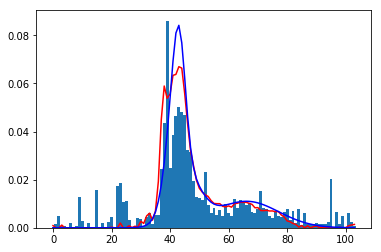

sim 3210/50000, loss: 0.0047, losses_av: 0.0057, tv: 0.00131,  shrink: 0.02585, ll: 0.0027, nbins: 419
sim 3220/50000, loss: 0.0021, losses_av: 0.0057, tv: 0.00131,  shrink: 0.02584, ll: 0.0027, nbins: 348
sim 3230/50000, loss: 0.0039, losses_av: 0.0057, tv: 0.00131,  shrink: 0.02588, ll: 0.0027, nbins: 370
sim 3240/50000, loss: 0.0034, losses_av: 0.0056, tv: 0.00131,  shrink: 0.02589, ll: 0.0027, nbins: 311
sim 3250/50000, loss: 0.0007, losses_av: 0.0056, tv: 0.00130,  shrink: 0.02588, ll: 0.0027, nbins: 525
sim 3260/50000, loss: 0.0026, losses_av: 0.0056, tv: 0.00130,  shrink: 0.02591, ll: 0.0027, nbins: 267
sim 3270/50000, loss: 0.0016, losses_av: 0.0056, tv: 0.00130,  shrink: 0.02589, ll: 0.0027, nbins: 386
sim 3280/50000, loss: 0.0027, losses_av: 0.0056, tv: 0.00129,  shrink: 0.02590, ll: 0.0027, nbins: 102
sim 3290/50000, loss: 0.0072, losses_av: 0.0056, tv: 0.00129,  shrink: 0.02590, ll: 0.0027, nbins: 467
sim 3300/50000, loss: 0.0070, losses_av: 0.0057, tv: 0.00129,  shrink: 0.

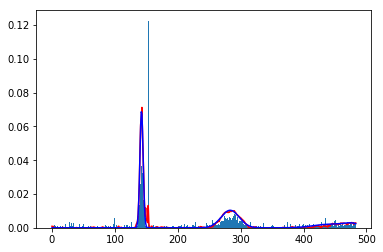

sim 3310/50000, loss: 0.0017, losses_av: 0.0056, tv: 0.00129,  shrink: 0.02590, ll: 0.0027, nbins: 343
sim 3320/50000, loss: 0.0018, losses_av: 0.0056, tv: 0.00128,  shrink: 0.02591, ll: 0.0027, nbins: 315
sim 3330/50000, loss: 0.0075, losses_av: 0.0056, tv: 0.00128,  shrink: 0.02599, ll: 0.0027, nbins: 568
sim 3340/50000, loss: 0.0008, losses_av: 0.0055, tv: 0.00128,  shrink: 0.02598, ll: 0.0027, nbins: 571
sim 3350/50000, loss: 0.0005, losses_av: 0.0056, tv: 0.00128,  shrink: 0.02597, ll: 0.0027, nbins: 516
sim 3360/50000, loss: 0.0258, losses_av: 0.0056, tv: 0.00127,  shrink: 0.02601, ll: 0.0027, nbins: 227
sim 3370/50000, loss: 0.0011, losses_av: 0.0057, tv: 0.00127,  shrink: 0.02600, ll: 0.0027, nbins: 228
sim 3380/50000, loss: 0.0031, losses_av: 0.0057, tv: 0.00127,  shrink: 0.02600, ll: 0.0027, nbins: 322
sim 3390/50000, loss: 0.0028, losses_av: 0.0057, tv: 0.00127,  shrink: 0.02600, ll: 0.0027, nbins: 89
sim 3400/50000, loss: 0.0019, losses_av: 0.0058, tv: 0.00126,  shrink: 0.0

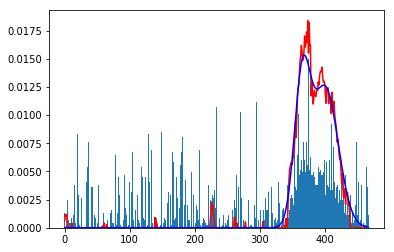

sim 3410/50000, loss: 0.0098, losses_av: 0.0058, tv: 0.00126,  shrink: 0.02607, ll: 0.0027, nbins: 417
sim 3420/50000, loss: 0.0010, losses_av: 0.0058, tv: 0.00126,  shrink: 0.02605, ll: 0.0027, nbins: 582
sim 3430/50000, loss: 0.0300, losses_av: 0.0059, tv: 0.00126,  shrink: 0.02612, ll: 0.0027, nbins: 19
sim 3440/50000, loss: 0.0085, losses_av: 0.0059, tv: 0.00125,  shrink: 0.02613, ll: 0.0027, nbins: 510
sim 3450/50000, loss: 0.0031, losses_av: 0.0059, tv: 0.00125,  shrink: 0.02614, ll: 0.0027, nbins: 596
sim 3460/50000, loss: 0.0020, losses_av: 0.0059, tv: 0.00125,  shrink: 0.02612, ll: 0.0027, nbins: 127
sim 3470/50000, loss: 0.0017, losses_av: 0.0058, tv: 0.00125,  shrink: 0.02612, ll: 0.0027, nbins: 402
sim 3480/50000, loss: 0.0256, losses_av: 0.0058, tv: 0.00124,  shrink: 0.02616, ll: 0.0028, nbins: 553
sim 3490/50000, loss: 0.0034, losses_av: 0.0058, tv: 0.00124,  shrink: 0.02615, ll: 0.0028, nbins: 131
sim 3500/50000, loss: 0.0037, losses_av: 0.0058, tv: 0.00124,  shrink: 0.0

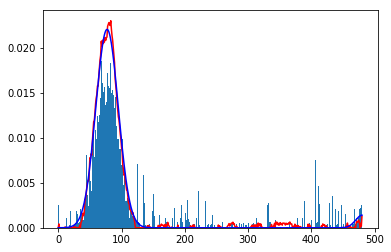

sim 3510/50000, loss: 0.0049, losses_av: 0.0058, tv: 0.00124,  shrink: 0.02621, ll: 0.0028, nbins: 528
sim 3520/50000, loss: 0.0019, losses_av: 0.0059, tv: 0.00124,  shrink: 0.02619, ll: 0.0028, nbins: 230
sim 3530/50000, loss: 0.0019, losses_av: 0.0058, tv: 0.00123,  shrink: 0.02621, ll: 0.0028, nbins: 376
sim 3540/50000, loss: 0.0086, losses_av: 0.0059, tv: 0.00123,  shrink: 0.02624, ll: 0.0028, nbins: 600
sim 3550/50000, loss: 0.0098, losses_av: 0.0060, tv: 0.00123,  shrink: 0.02622, ll: 0.0028, nbins: 446
sim 3560/50000, loss: 0.0015, losses_av: 0.0059, tv: 0.00123,  shrink: 0.02622, ll: 0.0028, nbins: 348
sim 3570/50000, loss: 0.0016, losses_av: 0.0059, tv: 0.00122,  shrink: 0.02620, ll: 0.0028, nbins: 537
sim 3580/50000, loss: 0.0033, losses_av: 0.0059, tv: 0.00122,  shrink: 0.02624, ll: 0.0028, nbins: 499
sim 3590/50000, loss: 0.0315, losses_av: 0.0060, tv: 0.00122,  shrink: 0.02628, ll: 0.0028, nbins: 133
sim 3600/50000, loss: 0.0033, losses_av: 0.0060, tv: 0.00122,  shrink: 0.

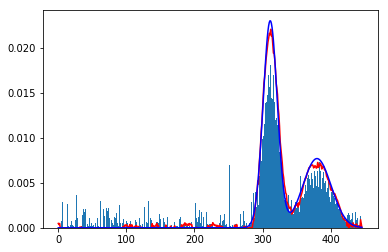

sim 3610/50000, loss: 0.0528, losses_av: 0.0060, tv: 0.00121,  shrink: 0.02631, ll: 0.0029, nbins: 31
sim 3620/50000, loss: 0.0018, losses_av: 0.0060, tv: 0.00121,  shrink: 0.02633, ll: 0.0029, nbins: 424
sim 3630/50000, loss: 0.0534, losses_av: 0.0061, tv: 0.00121,  shrink: 0.02642, ll: 0.0030, nbins: 19
sim 3640/50000, loss: 0.0065, losses_av: 0.0060, tv: 0.00121,  shrink: 0.02642, ll: 0.0030, nbins: 72
sim 3650/50000, loss: 0.0029, losses_av: 0.0060, tv: 0.00120,  shrink: 0.02641, ll: 0.0030, nbins: 217
sim 3660/50000, loss: 0.0091, losses_av: 0.0060, tv: 0.00120,  shrink: 0.02646, ll: 0.0030, nbins: 236
sim 3670/50000, loss: 0.0024, losses_av: 0.0060, tv: 0.00120,  shrink: 0.02644, ll: 0.0030, nbins: 493
sim 3680/50000, loss: 0.0013, losses_av: 0.0059, tv: 0.00120,  shrink: 0.02642, ll: 0.0030, nbins: 479
sim 3690/50000, loss: 0.0044, losses_av: 0.0059, tv: 0.00119,  shrink: 0.02644, ll: 0.0030, nbins: 455
sim 3700/50000, loss: 0.0011, losses_av: 0.0058, tv: 0.00119,  shrink: 0.026

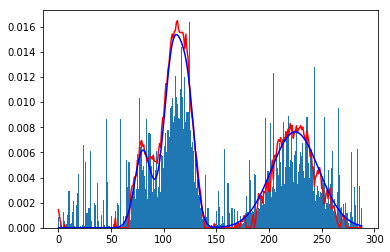

sim 3710/50000, loss: 0.0017, losses_av: 0.0058, tv: 0.00119,  shrink: 0.02644, ll: 0.0030, nbins: 458
sim 3720/50000, loss: 0.0019, losses_av: 0.0058, tv: 0.00119,  shrink: 0.02642, ll: 0.0030, nbins: 218
sim 3730/50000, loss: 0.0040, losses_av: 0.0058, tv: 0.00119,  shrink: 0.02645, ll: 0.0030, nbins: 66
sim 3740/50000, loss: 0.0022, losses_av: 0.0058, tv: 0.00118,  shrink: 0.02646, ll: 0.0030, nbins: 349
sim 3750/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00118,  shrink: 0.02645, ll: 0.0030, nbins: 357
sim 3760/50000, loss: 0.0019, losses_av: 0.0057, tv: 0.00118,  shrink: 0.02645, ll: 0.0030, nbins: 218
sim 3770/50000, loss: 0.0087, losses_av: 0.0056, tv: 0.00118,  shrink: 0.02644, ll: 0.0030, nbins: 133
sim 3780/50000, loss: 0.0045, losses_av: 0.0056, tv: 0.00117,  shrink: 0.02646, ll: 0.0030, nbins: 79
sim 3790/50000, loss: 0.0179, losses_av: 0.0056, tv: 0.00117,  shrink: 0.02647, ll: 0.0030, nbins: 47
sim 3800/50000, loss: 0.0012, losses_av: 0.0056, tv: 0.00117,  shrink: 0.026

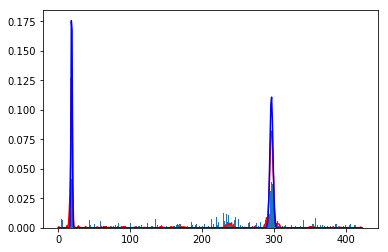

sim 3810/50000, loss: 0.0017, losses_av: 0.0055, tv: 0.00117,  shrink: 0.02645, ll: 0.0030, nbins: 305
sim 3820/50000, loss: 0.0063, losses_av: 0.0057, tv: 0.00116,  shrink: 0.02647, ll: 0.0030, nbins: 269
sim 3830/50000, loss: 0.0040, losses_av: 0.0057, tv: 0.00116,  shrink: 0.02646, ll: 0.0030, nbins: 68
sim 3840/50000, loss: 0.0025, losses_av: 0.0057, tv: 0.00116,  shrink: 0.02647, ll: 0.0030, nbins: 283
sim 3850/50000, loss: 0.0170, losses_av: 0.0057, tv: 0.00116,  shrink: 0.02650, ll: 0.0031, nbins: 52
sim 3860/50000, loss: 0.0143, losses_av: 0.0057, tv: 0.00115,  shrink: 0.02652, ll: 0.0031, nbins: 301
sim 3870/50000, loss: 0.0157, losses_av: 0.0056, tv: 0.00115,  shrink: 0.02655, ll: 0.0031, nbins: 388
sim 3880/50000, loss: 0.0029, losses_av: 0.0057, tv: 0.00115,  shrink: 0.02656, ll: 0.0031, nbins: 506
sim 3890/50000, loss: 0.0016, losses_av: 0.0057, tv: 0.00115,  shrink: 0.02657, ll: 0.0031, nbins: 464
sim 3900/50000, loss: 0.0006, losses_av: 0.0056, tv: 0.00115,  shrink: 0.02

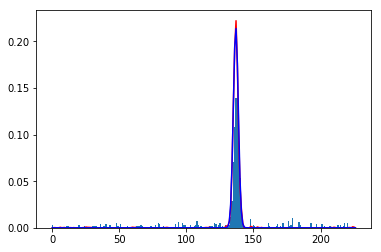

sim 3910/50000, loss: 0.0014, losses_av: 0.0056, tv: 0.00114,  shrink: 0.02659, ll: 0.0031, nbins: 565
sim 3920/50000, loss: 0.0017, losses_av: 0.0056, tv: 0.00114,  shrink: 0.02658, ll: 0.0031, nbins: 183
sim 3930/50000, loss: 0.0013, losses_av: 0.0056, tv: 0.00114,  shrink: 0.02658, ll: 0.0031, nbins: 289
sim 3940/50000, loss: 0.0027, losses_av: 0.0056, tv: 0.00114,  shrink: 0.02659, ll: 0.0031, nbins: 61
sim 3950/50000, loss: 0.0013, losses_av: 0.0057, tv: 0.00113,  shrink: 0.02657, ll: 0.0031, nbins: 481
sim 3960/50000, loss: 0.0043, losses_av: 0.0057, tv: 0.00113,  shrink: 0.02662, ll: 0.0031, nbins: 26
sim 3970/50000, loss: 0.0176, losses_av: 0.0057, tv: 0.00113,  shrink: 0.02664, ll: 0.0031, nbins: 163
sim 3980/50000, loss: 0.0007, losses_av: 0.0056, tv: 0.00113,  shrink: 0.02663, ll: 0.0031, nbins: 553
sim 3990/50000, loss: 0.0210, losses_av: 0.0057, tv: 0.00113,  shrink: 0.02668, ll: 0.0031, nbins: 24
sim 4000/50000, loss: 0.0185, losses_av: 0.0057, tv: 0.00112,  shrink: 0.026

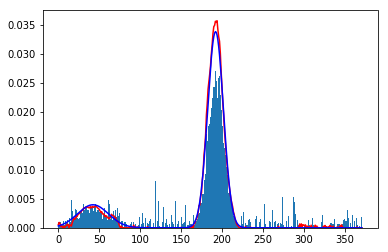

sim 4010/50000, loss: 0.0012, losses_av: 0.0057, tv: 0.00112,  shrink: 0.02669, ll: 0.0031, nbins: 223
sim 4020/50000, loss: 0.0136, losses_av: 0.0058, tv: 0.00112,  shrink: 0.02674, ll: 0.0031, nbins: 26
sim 4030/50000, loss: 0.0161, losses_av: 0.0058, tv: 0.00112,  shrink: 0.02675, ll: 0.0032, nbins: 42
sim 4040/50000, loss: 0.0011, losses_av: 0.0057, tv: 0.00111,  shrink: 0.02675, ll: 0.0032, nbins: 530
sim 4050/50000, loss: 0.0012, losses_av: 0.0057, tv: 0.00111,  shrink: 0.02675, ll: 0.0032, nbins: 310
sim 4060/50000, loss: 0.0092, losses_av: 0.0057, tv: 0.00111,  shrink: 0.02676, ll: 0.0032, nbins: 345
sim 4070/50000, loss: 0.0045, losses_av: 0.0057, tv: 0.00111,  shrink: 0.02678, ll: 0.0032, nbins: 181
sim 4080/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00111,  shrink: 0.02678, ll: 0.0032, nbins: 333
sim 4090/50000, loss: 0.0007, losses_av: 0.0058, tv: 0.00110,  shrink: 0.02677, ll: 0.0032, nbins: 438
sim 4100/50000, loss: 0.0027, losses_av: 0.0058, tv: 0.00110,  shrink: 0.02

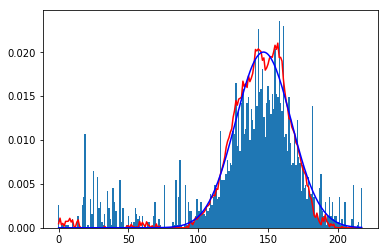

sim 4110/50000, loss: 0.0019, losses_av: 0.0058, tv: 0.00110,  shrink: 0.02680, ll: 0.0031, nbins: 306
sim 4120/50000, loss: 0.0031, losses_av: 0.0058, tv: 0.00110,  shrink: 0.02679, ll: 0.0031, nbins: 399
sim 4130/50000, loss: 0.0039, losses_av: 0.0058, tv: 0.00109,  shrink: 0.02678, ll: 0.0031, nbins: 274
sim 4140/50000, loss: 0.0013, losses_av: 0.0058, tv: 0.00109,  shrink: 0.02676, ll: 0.0031, nbins: 472
sim 4150/50000, loss: 0.0011, losses_av: 0.0058, tv: 0.00109,  shrink: 0.02675, ll: 0.0031, nbins: 221
sim 4160/50000, loss: 0.0072, losses_av: 0.0058, tv: 0.00109,  shrink: 0.02676, ll: 0.0031, nbins: 60
sim 4170/50000, loss: 0.0034, losses_av: 0.0057, tv: 0.00109,  shrink: 0.02677, ll: 0.0031, nbins: 242
sim 4180/50000, loss: 0.0017, losses_av: 0.0057, tv: 0.00108,  shrink: 0.02676, ll: 0.0031, nbins: 552
sim 4190/50000, loss: 0.0013, losses_av: 0.0057, tv: 0.00108,  shrink: 0.02675, ll: 0.0031, nbins: 552
sim 4200/50000, loss: 0.0174, losses_av: 0.0057, tv: 0.00108,  shrink: 0.0

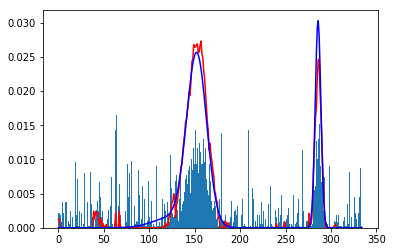

sim 4210/50000, loss: 0.0022, losses_av: 0.0057, tv: 0.00108,  shrink: 0.02681, ll: 0.0032, nbins: 196
sim 4220/50000, loss: 0.0009, losses_av: 0.0057, tv: 0.00108,  shrink: 0.02680, ll: 0.0031, nbins: 464
sim 4230/50000, loss: 0.0011, losses_av: 0.0057, tv: 0.00107,  shrink: 0.02680, ll: 0.0031, nbins: 599
sim 4240/50000, loss: 0.0018, losses_av: 0.0056, tv: 0.00107,  shrink: 0.02679, ll: 0.0031, nbins: 200
sim 4250/50000, loss: 0.0043, losses_av: 0.0056, tv: 0.00107,  shrink: 0.02680, ll: 0.0031, nbins: 54
sim 4260/50000, loss: 0.0027, losses_av: 0.0056, tv: 0.00107,  shrink: 0.02680, ll: 0.0031, nbins: 135
sim 4270/50000, loss: 0.0025, losses_av: 0.0055, tv: 0.00106,  shrink: 0.02679, ll: 0.0031, nbins: 111
sim 4280/50000, loss: 0.0007, losses_av: 0.0056, tv: 0.00106,  shrink: 0.02677, ll: 0.0031, nbins: 399
sim 4290/50000, loss: 0.0010, losses_av: 0.0056, tv: 0.00106,  shrink: 0.02675, ll: 0.0031, nbins: 463
sim 4300/50000, loss: 0.0015, losses_av: 0.0055, tv: 0.00106,  shrink: 0.0

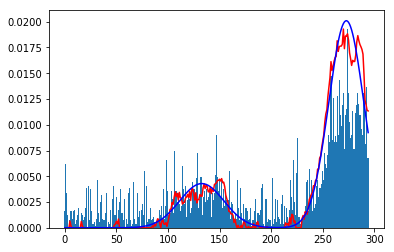

sim 4310/50000, loss: 0.0054, losses_av: 0.0055, tv: 0.00106,  shrink: 0.02677, ll: 0.0031, nbins: 123
sim 4320/50000, loss: 0.0005, losses_av: 0.0055, tv: 0.00105,  shrink: 0.02675, ll: 0.0031, nbins: 495
sim 4330/50000, loss: 0.0150, losses_av: 0.0055, tv: 0.00105,  shrink: 0.02679, ll: 0.0031, nbins: 26
sim 4340/50000, loss: 0.0013, losses_av: 0.0055, tv: 0.00105,  shrink: 0.02679, ll: 0.0031, nbins: 366
sim 4350/50000, loss: 0.0104, losses_av: 0.0055, tv: 0.00105,  shrink: 0.02679, ll: 0.0031, nbins: 132
sim 4360/50000, loss: 0.0011, losses_av: 0.0055, tv: 0.00105,  shrink: 0.02679, ll: 0.0031, nbins: 441
sim 4370/50000, loss: 0.0012, losses_av: 0.0055, tv: 0.00104,  shrink: 0.02679, ll: 0.0031, nbins: 418
sim 4380/50000, loss: 0.0016, losses_av: 0.0054, tv: 0.00104,  shrink: 0.02680, ll: 0.0031, nbins: 548
sim 4390/50000, loss: 0.0007, losses_av: 0.0054, tv: 0.00104,  shrink: 0.02678, ll: 0.0031, nbins: 276
sim 4400/50000, loss: 0.0007, losses_av: 0.0053, tv: 0.00104,  shrink: 0.0

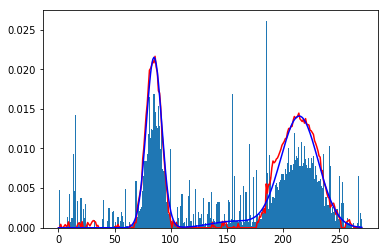

sim 4410/50000, loss: 0.0371, losses_av: 0.0055, tv: 0.00104,  shrink: 0.02682, ll: 0.0032, nbins: 26
sim 4420/50000, loss: 0.0054, losses_av: 0.0055, tv: 0.00103,  shrink: 0.02681, ll: 0.0032, nbins: 499
sim 4430/50000, loss: 0.0016, losses_av: 0.0057, tv: 0.00103,  shrink: 0.02681, ll: 0.0032, nbins: 281


In [ ]:
generator = RecordGenerator(n_obs=(1000, 10000),
                            noise_ratio=(0.2, 0.75),
                            noise_dispersion=(0.05, 1.0))
nsims = 50000
X = []
Y = []
losses = []
losses_av = []
lamb = 0.002
losses_av = []

bsize = 16

for sim in range(nsims):
    n_bins = np.random.randint(10, 601)
    Xbatch = []
    Ybatch = []
    for _ in range(bsize):
        data = generator.generate(n_bins=n_bins)
        x = np.array(data['counts'], dtype=np.float32)
        x /= x.sum()
        Xbatch.append(x)
        y = data['signal_normalized']
        Ybatch.append(y)
    Xbatch = tf.constant(np.expand_dims(np.stack(Xbatch, 0), -1), tf.float32)
    Ybatch = tf.constant(np.expand_dims(np.stack(Ybatch, 0), -1), tf.float32)
    loss = model.train_on_batch(Xbatch, Ybatch)
    losses.append(float(loss))
    if sim == 0:
        losses_av.append(float(loss))
        yhat = model(Xbatch)
        tv_ = tv2(yhat)
        shrink_ = ridge(yhat)
        ll_ = llhood(Ybatch, yhat)
    else:
        L = lamb * losses[-1] + (1.0 - lamb) * losses_av[-1]
        losses_av.append(L)

    if sim == 0 or (sim + 1) % 10 == 0:
        yhat = model(Xbatch)
        tv_ += lamb * (lamb * tv2(yhat) - tv_)
        shrink_ += lamb * (ridge(yhat) - shrink_)
        ll_ += lamb * (llhood(Ybatch, yhat) - ll_)
        print(f"sim {sim + 1}/{nsims}, loss: {losses[-1]:.4f}, ", end="")
        print(f"losses_av: {losses_av[-1]:.4f}, tv: {tv_:.5f}, ", end="")
        print(f" shrink: {shrink_:.5f}, ll: {ll_:.4f}, nbins: {n_bins}")

    if sim == 0 or (sim + 1) % 100 == 0:
        plot_test_case()
        plt.show()
        model.save_weights("tmp.h5")




In [ ]:

# plt.plot(losses)
plt.plot(losses_av, c="red")



In [ ]:
x, y, yhat = plot_test_case()

In [ ]:
plt.scatter(yhat, y)
plt.xlabel("prediction")
plt.ylabel("truth")
M = max(max(yhat), max(y))
plt.plot([0, M], [0, M], c="red")